this[https://www.izhikevich.org/publications/spikes.htm] is a link to an ODE model for neuronal spiking by Ichikevich.
I stress again that this is an ODE so we wont be fucked over by accidentally doing a PDE thing again.
This is basically an extention of Hodgkin-Huxley.
I've had a stab at implementing it here.

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-04 ...  9.999e-01  1.000e+00]
        y: [[-8.500e+01 -8.500e+01 ... -2.786e+01 -2.786e+01]
            [-6.500e+01 -6.499e+01 ...  1.545e+02  1.548e+02]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fb5a10c5db0>
 t_events: [array([], dtype=float64)]
 y_events: [array([], dtype=float64)]
     nfev: 230
     njev: 0
      nlu: 0

-------------------------
t_events: []
y_events: []
-------------------------



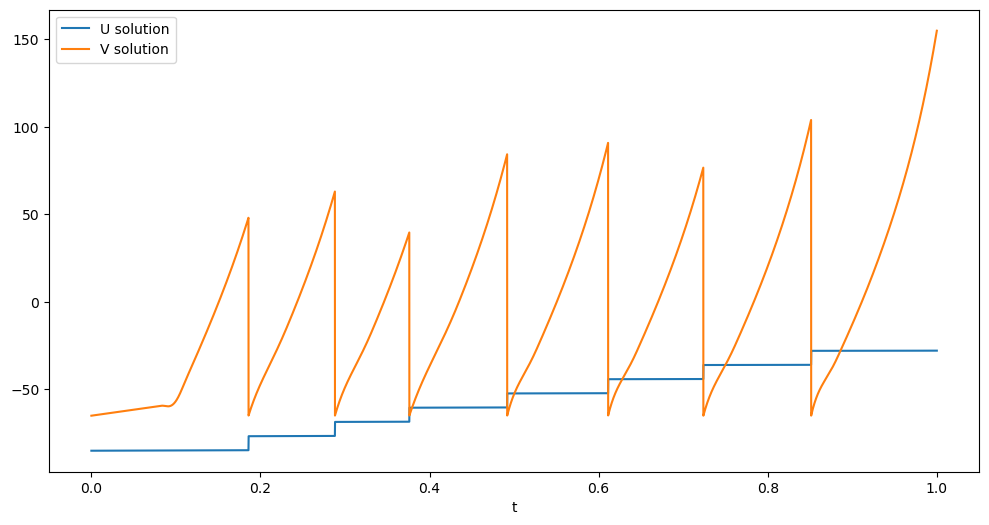

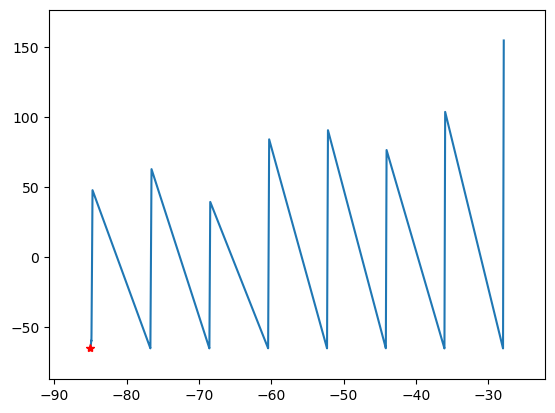

In [20]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

a = 0.02
b = 0.2
c = -65
d = 8
I = 0 

# v is membrane potential
# u is membrane recovery variable, accounts for K+, activation, Na+ inactivation, negative 
# feedback to v




ic = [-85,-65]
t_span = [0, 1] 
t_eval = np.linspace(t_span[0], t_span[1], max((t_span[1] - t_span[0])*100, 10000))

params = (a,b,c,d,I)


def izhikevich(t, y, a, b, c, d, I):
    u, v = y

    I = 0 if t < t_span[1]/10 else 1000

    if y[1] > 30:
        y[0] = y[0] + d
        y[1] = c

    dudt = a*(b*v - u)
    dvdt = 0.04 * v**2 + 5*v + 140 - u + I
    return [dudt, dvdt]

def event(t,y, a, b, c, d, I):
    return y[1]-30

# event.terminal = True

soln = solve_ivp(izhikevich, 
                t_span,
                ic,     
                args=params,     
                dense_output=True,     
                t_eval=t_eval,    
                events=event
                )

print(soln)

fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(soln.t, soln.y[0], label="U solution")
ax1.plot(soln.t, soln.y[1], label="V solution")
ax1.set_xlabel("t")
ax1.plot(soln.t_events[0], soln.y_events[0], 'go')
ax1.legend()

bounds = [
    min(soln.y[0]),
    max(soln.y[0]),
    min(soln.y[1]),
    max(soln.y[1]),
    (max(soln.y[0]) - min(soln.y[0])) / 10,
    (max(soln.y[1]) - min(soln.y[1])) / 10
]


print(f"\n{"-"*25}\nt_events: {soln.t_events[0]}\ny_events: {soln.y_events[0]}\n{"-"*25}\n")



arrow_count = 20
# u_grid, v_grid = np.meshgrid(
#     np.linspace(bounds[0]-bounds[4], bounds[1]+bounds[4], arrow_count),
#     np.linspace(bounds[2]-bounds[5], bounds[3]+bounds[5], arrow_count)
# )
# dudt_grid, dvdt_grid = izhikevich(0,(u_grid,v_grid), *params)
# norm = np.sqrt(dudt_grid**2 + dvdt_grid**2) + 1e-8 
# dudt_norm, dvdt_norm = dudt_grid / norm, dvdt_grid / norm

fig2,ax2 = plt.subplots()
# ax2.quiver(u_grid,v_grid, dudt_norm, dvdt_norm, color="lightgray")
ax2.plot(soln.y[0], soln.y[1])
ax2.set_xlim(bounds[0]-bounds[4], bounds[1]+bounds[4])
ax2.set_ylim(bounds[2]-bounds[5], bounds[3]+bounds[5])
ax2.plot(ic[0], ic[1], 'r*')


